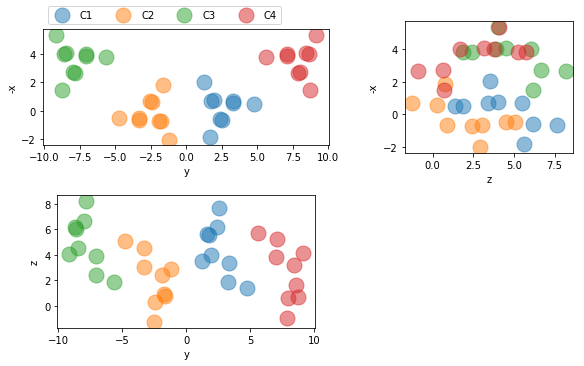

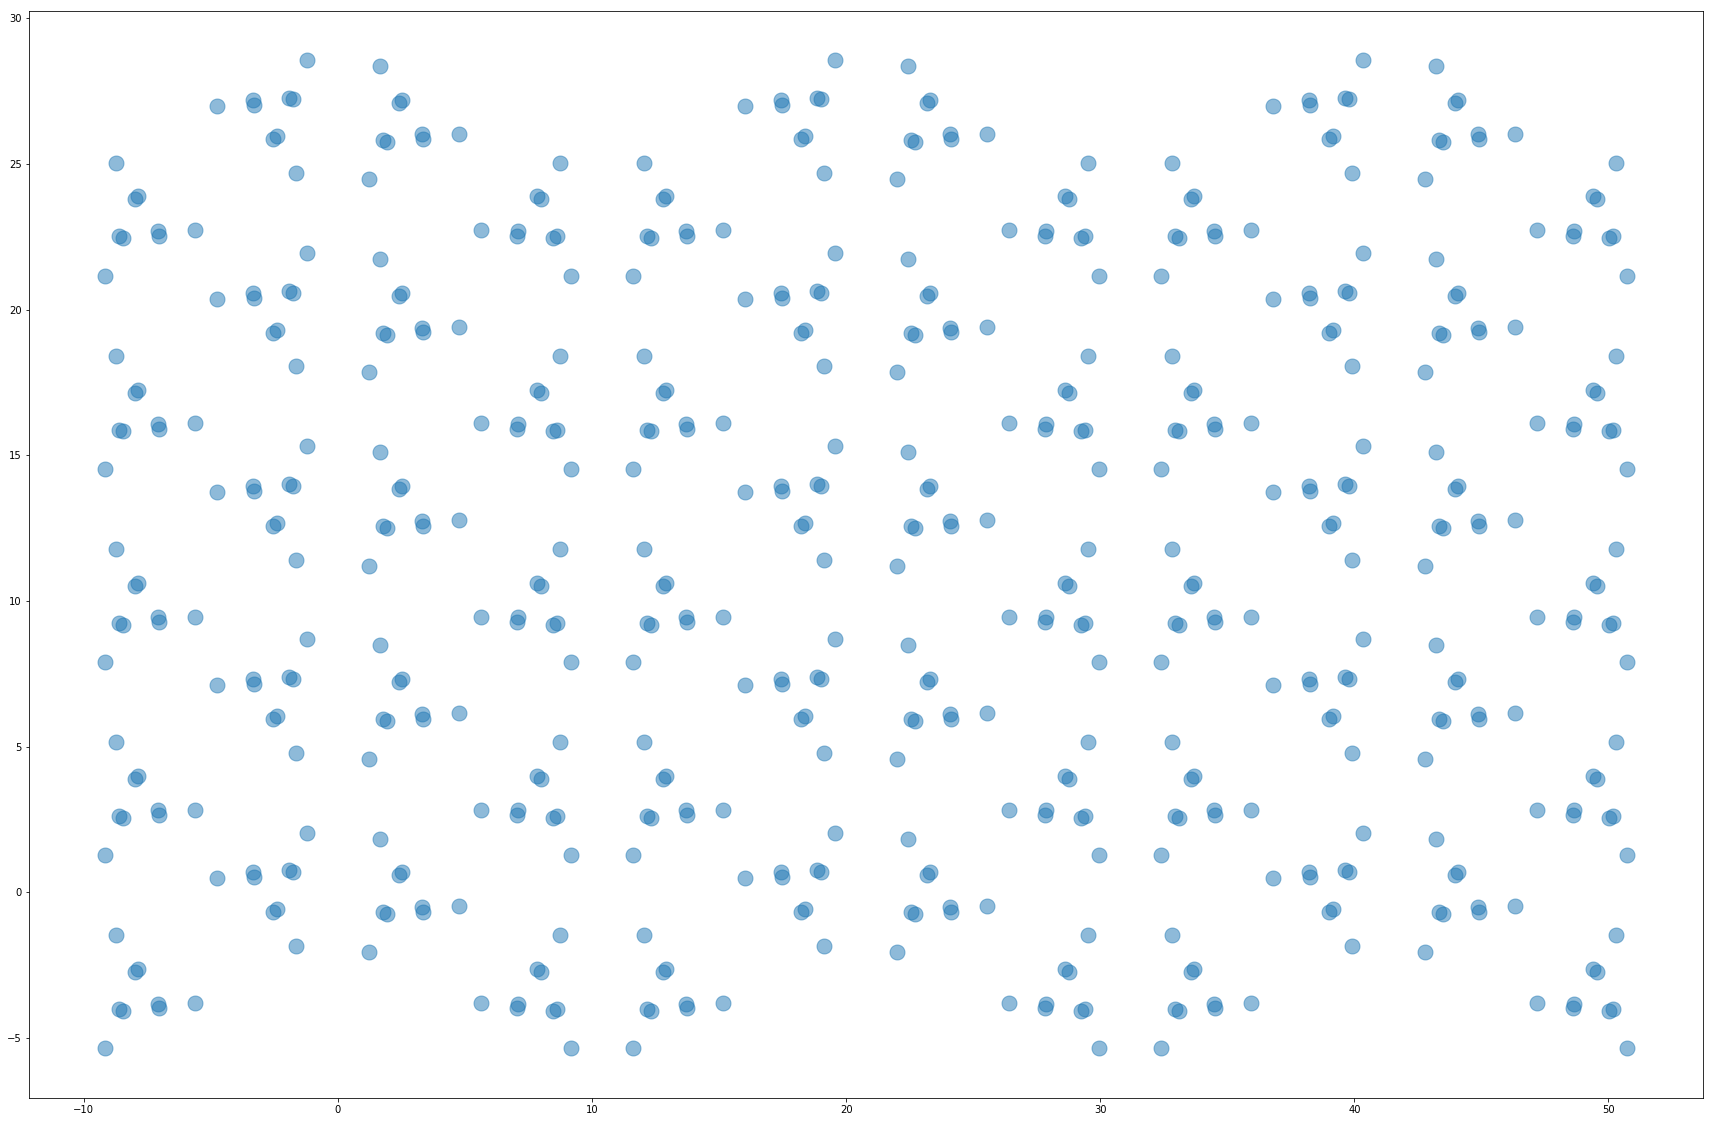

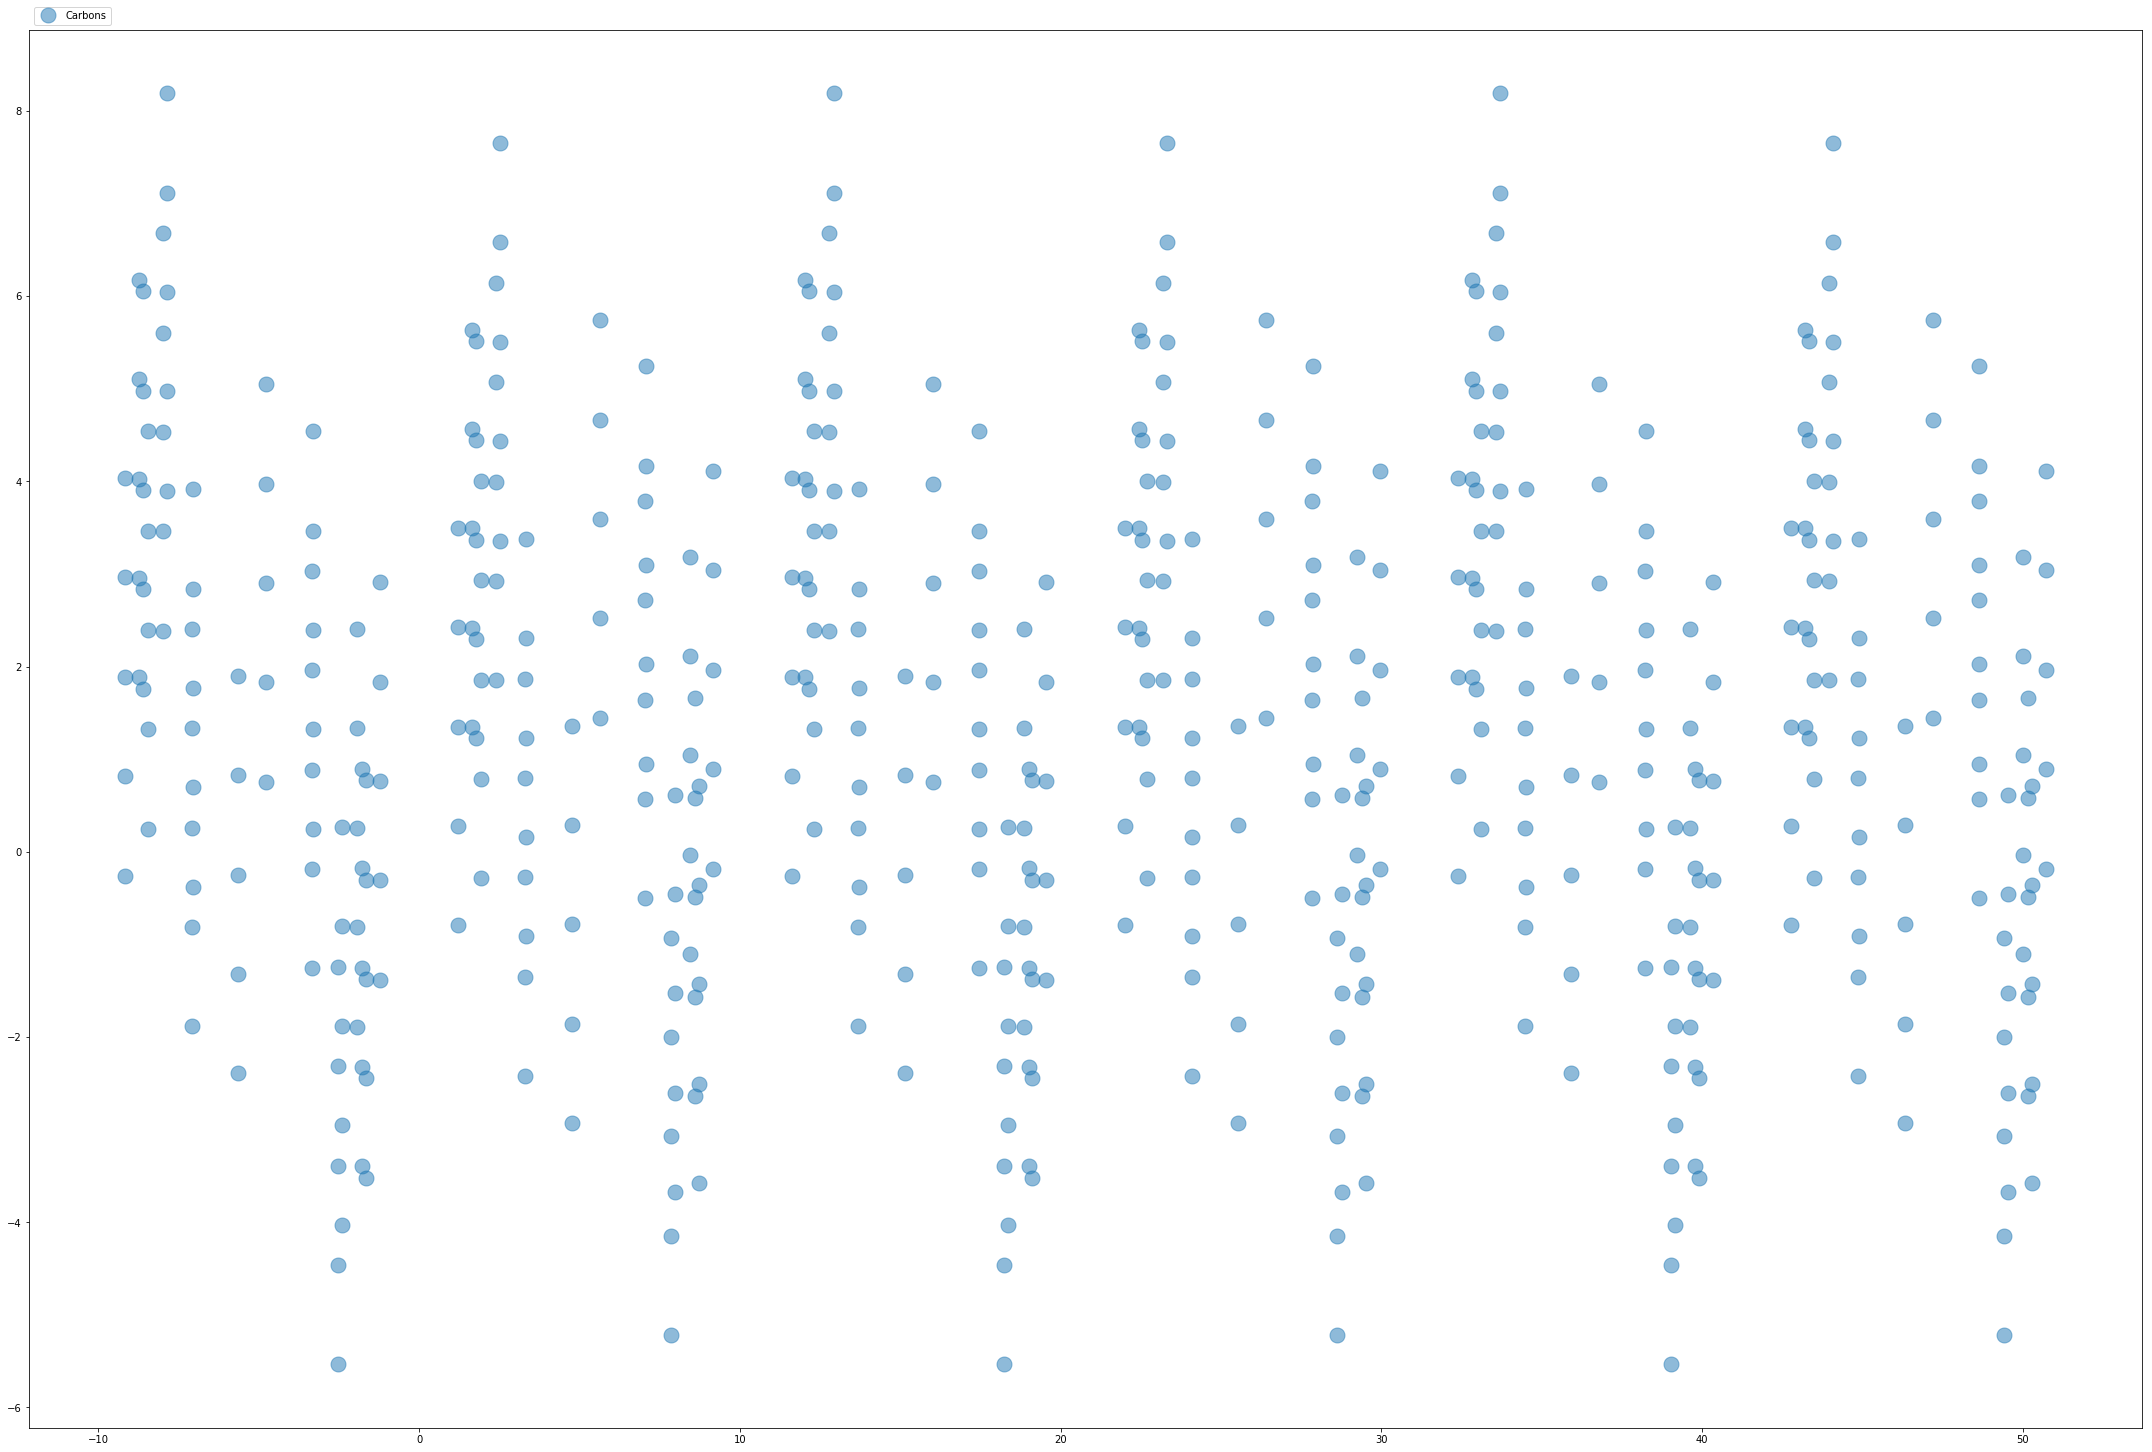

In [195]:
import numpy
import math
from matplotlib import pyplot

''' Atomic fractional coordiantes x/a, y/b, and z/c
from (1988 Macromolecules Immiczi and Iannelil) 
Comments indicate bonding. '''

C1 = numpy.array([[-0.0727, 0.2291, 0.2004],  # 0: 1
                  [-0.0765, 0.1592, 0.2788],  # 1: 0 2
                  [-0.1021, 0.1602, 0.5098],  # 2: 1 4
                  [-0.3087, 0.0589, 0.4941],  # 3: 4
                  [-0.1146, 0.0928, 0.6057],  # 4: 2 3 5
                  [-0.1044, 0.0854, 0.8428],  # 5: 4 7
                  [ 0.2775, 0.0797, 0.9260],  # 6: 7
                  [ 0.0872, 0.1156, 0.9730],  # 7: 5 6 8
                  [ 0.1026, 0.1221, 1.2109]]) # 8: 7

''' Angle between c vector and x-axis. '''
beta = 99.5 * numpy.pi / 180.0

''' Columns of unit_cell are the a, b, and c cell vectors. '''
unit_cell = numpy.array([[6.63,  0.00, 6.50*numpy.cos(beta)],
                         [0.00, 20.78, 0.0],
                         [0.00,  0.00, 6.50*numpy.sin(beta)]])


def apply_space_group(C1):
    ''' Edited symmetry operations to make figure match - not checked '''
    C2, C3, C4 = C1.copy(), C1.copy(), C1.copy()

    C2[:,0] = -C2[:,0]
    C2[:,1] = -C2[:,1]
    C2[:,2] = -C2[:,2] + 1.0

    C3[:,0] =  C3[:,0] - 0.5
    C3[:,1] =  C3[:,1] - 0.5
    C3[:,2] =  C3[:,2]

    C4[:,0] =  C4[:,0] - 0.5
    C4[:,1] = -C4[:,1] + 0.5
    C4[:,2] = -C4[:,2] + 1.0   
    
    return C1, C2, C3, C4


def plot_unit_cell(CC):
    
    C = numpy.vstack([numpy.dot(C, unit_cell) for C in apply_space_group(CC)])
    
    lx, ly = unit_cell[0,0], unit_cell[1,1]
    
    figure = pyplot.figure(figsize=(9,5))
    aC = pyplot.subplot(221)
    
    
    aC.plot(C[:9,1],    -C[:9,0],    '.', ms=30, alpha=0.5, label='C1')
    aC.plot(C[9:18,1],  -C[9:18,0],  '.', ms=30, alpha=0.5, label='C2')
    aC.plot(C[18:27,1], -C[18:27,0], '.', ms=30, alpha=0.5, label='C3')
    aC.plot(C[27:36,1], -C[27:36,0], '.', ms=30, alpha=0.5, label='C4')
    aC.set_xlabel('y')
    aC.set_ylabel('-x')
    aC.set_aspect('equal')
    
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    aC = pyplot.subplot(222)
    
    aC.plot(C[:9,2],    -C[:9,0],    '.', ms=30, alpha=0.5, label='C1')
    aC.plot(C[9:18,2],  -C[9:18,0],  '.', ms=30, alpha=0.5, label='C2')
    aC.plot(C[18:27,2], -C[18:27,0], '.', ms=30, alpha=0.5, label='C3')
    aC.plot(C[27:36,2], -C[27:36,0], '.', ms=30, alpha=0.5, label='C4')
    aC.set_xlabel('z')
    aC.set_ylabel('-x')
    aC.set_aspect('equal')

    aC = pyplot.subplot(223)

    aC.plot(C[:9,1],    C[:9,2],    '.', ms=30, alpha=0.5, label='C1')
    aC.plot(C[9:18,1],  C[9:18,2],  '.', ms=30, alpha=0.5, label='C2')
    aC.plot(C[18:27,1], C[18:27,2], '.', ms=30, alpha=0.5, label='C3')
    aC.plot(C[27:36,1], C[27:36,2], '.', ms=30, alpha=0.5, label='C4')
    aC.set_xlabel('y')
    aC.set_ylabel('z')
    aC.set_aspect('equal')
    
    pyplot.tight_layout()
    
    return C

def unit_vector(v):
    return v / numpy.linalg.norm(v)
        
def crystal(a,b,c):
    ''' Creating the initial crystalline system - a & b & c are the dimensions of the system ''' 
    C = numpy.vstack([C for C in apply_space_group(C1)])
    
    Carbons = numpy.zeros([a*b*c*36,3])    
                
    for i in range(a):
        Carbons[(36*i):(36*(i+1)),0] = C[:,0] + float(i)
        Carbons[(36*i):(36*(i+1)),1] = C[:,1]
        Carbons[(36*i):(36*(i+1)),2] = C[:,2]   
    
    for j in range(1,b):
        Carbons[36*(a*j):36*(a*(j+1)),0] = Carbons[0:36*a,0]
        Carbons[36*(a*j):36*(a*(j+1)),1] = Carbons[0:36*a,1] + float(j)         
        Carbons[36*(a*j):36*(a*(j+1)),2] = Carbons[0:36*a,2] 
        
    for k in range(1,c):
        Carbons[36*(a*b*k):36*(a*b*(k+1)),0] = Carbons[0:36*a*b,0]
        Carbons[36*(a*b*k):36*(a*b*(k+1)),1] = Carbons[0:36*a*b,1]          
        Carbons[36*(a*b*k):36*(a*b*(k+1)),2] = Carbons[0:36*a*b,2] + float(k)                    
    
    Carbons = numpy.dot(Carbons, unit_cell)   
        
    return Carbons



def plot_crystal(C):
    fig1 = pyplot.figure(figsize = (30,20))      
    aC1 = pyplot.plot(C[:,1], C[:,0],'.', ms=30, alpha=0.5, label='Carbons')
    
    fig2 = pyplot.figure(figsize = (30,20))    
    aC2 = pyplot.plot(C[:,1], C[:,2],'.', ms=30, alpha=0.5, label='Carbons')
    
    pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')
    pyplot.tight_layout()

CC = plot_unit_cell(C1)

C = crystal(5,3,1)
plot_crystal(C)



In [196]:
# Determine which carbn atoms are bonded to each other.
def carbon_bonds(C):
    for i in range(len((C))):
        s = '{}:'.format(i)
        for j in range(len(C)):
            d = numpy.linalg.norm(C[i,:]-C[j,:])
            if i != j and d < 1.6:
                s += ' {}'.format(j)
        print(s)
    
    
#carbon_bonds(C)